# 웨딩 홀 후기 WordCloud 분석

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import sys
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 로드 및 전처리
데이터를 로드 한 뒤 html 태그 제거

In [20]:
base_dir = os.getcwd()

csv_path = os.path.join(base_dir, "..", "crawlers", "data", "raw", "웨딩 홀 후기_20260107_144824.csv")
csv_path = os.path.normpath(csv_path) # 경로 정규화 (.. 등을 정리)

print(f"최종 확인 경로: {csv_path}")

최종 확인 경로: /Users/statjhw/projects/softeer/missions/W2/src/crawlers/data/raw/웨딩 홀 후기_20260107_144824.csv


In [21]:
# CSV 파일 로드
df = pd.read_csv(csv_path)

print(f"총 데이터 수: {len(df)}")
print(f"\n컬럼: {list(df.columns)}")
print(f"\n처음 3개 데이터:")
df.head(3)

총 데이터 수: 1000

컬럼: ['title', 'link', 'description', 'bloggername', 'postdate', 'url', 'content', 'date', 'crawled_at']

처음 3개 데이터:


,title,link,description,bloggername,postdate,url,content,date,crawled_at
0,창원웨딩홀 투어 웨딩의전당 베리타홀 후기,https://blog.naver.com/ubkin2/223919536987,바로 창원<b>웨딩</b>의전당 내의 베리타홀이었죠. 처음에는 카페에서 우연히 <b...,우리 주위의 성공 사업자 및 가게 탐방,20250702,https://blog.naver.com/ubkin2/223919536987,"""본 포스팅은 유료광고를 포함하고 있습니다""\n\n​\n\n​\n\n결혼 준비를 하...",2025. 7. 2. 18:53,2026-01-07T14:48:28.004369
1,정말 잘한 선택이었던 스몰웨딩 홀 후기,https://blog.naver.com/hej1318200/223913359037,"부산 오린하우스 스몰 <b>웨딩</b>, 6개월 후 솔직 <b>후기</b> 식을 올...",한결같은 일상을 특별하게 '◡'✿,20250627,https://blog.naver.com/hej1318200/223913359037,"​\n\n🎀부산 오린하우스 스몰 웨딩, 6개월 후 솔직 후기\n\n식을 올린지 반년...",NaN,2026-01-07T14:48:32.187734
2,종로 웨딩홀 서울 채플 웨딩 후기 / 홀투어 & 뷔페 & 주차 : 백주년 기념관 웨...,https://blog.naver.com/bluesnake_/224122660044,네오트로 <b>웨딩홀</b>은 150인 이하 하객도 예식 진행이 가능하다고 하셨다!...,이세계 미식회,20251225,https://blog.naver.com/bluesnake_/224122660044,​\n\n​\n\n​\n\n​\n\n백주년 기념관 웨딩홀 네오트로\n\n📍: 서울 ...,2025. 12. 25. 23:37,2026-01-07T14:48:36.362146


In [22]:
# content 컬럼 확인
print(f"Content 데이터 수: {df['content'].notna().sum()}")
print(f"빈 Content 수: {df['content'].isna().sum()}")
print(f"\n첫 번째 content 샘플:")
print(df['content'].iloc[0][:300] if pd.notna(df['content'].iloc[0]) else "Empty")

Content 데이터 수: 1000
빈 Content 수: 0

첫 번째 content 샘플:
"본 포스팅은 유료광고를 포함하고 있습니다"

​

​

결혼 준비를 하다 보니까 사람마다 취향도

다르고 중요하게 보는 포인트가 달랐어요.

누구는 드레스에 진심을 담아서 고르고 

또 어떤 친구는 스튜디오 촬영에 힘을

쓰는 걸 볼 수 있었는데 어떤 사람은 부케의

꽃 중류도 세심하게 따져보더라고요.

그중에서도 저는 웨딩홀을 가장 중요하게

생각해서 오랫동안 고민하였답니다.

​

이유는 간단했는데 결혼식이라는 하루에

끝나는 행사는 결국 찾아준 하객 분들과

가장 많은 시간을 보내는 자리이고 공간이

가진 분위기, 흐름, 동


In [23]:
# 모든 content 텍스트 합치기
all_text = ' '.join(df['content'].dropna().astype(str))

# HTML 태그 제거
all_text = re.sub(r'<[^>]+>', '', all_text)

print(f"총 텍스트 길이: {len(all_text):,} 자")
print(f"\n텍스트 샘플:\n{all_text[:200]}...")

총 텍스트 길이: 1,736,841 자

텍스트 샘플:
"본 포스팅은 유료광고를 포함하고 있습니다"

​

​

결혼 준비를 하다 보니까 사람마다 취향도

다르고 중요하게 보는 포인트가 달랐어요.

누구는 드레스에 진심을 담아서 고르고 

또 어떤 친구는 스튜디오 촬영에 힘을

쓰는 걸 볼 수 있었는데 어떤 사람은 부케의

꽃 중류도 세심하게 따져보더라고요.

그중에서도 저는 웨딩홀을 가장 중요하게

생각해서 ...


## 2. 불용어 제거
기존 한국어 불용어 파일과 추가한 불용어 제거

In [24]:
# 불용어 파일 로드
stop_words = []
with open('config/stopwords-ko.txt', 'r') as f:
    for w in f.readlines():
        stop_words.append(w.strip())

# 추가 불용어 (웨딩 후기 분석에 특화)
additional_stopwords = [
    # 부사/형용사
    '잘', '정말', '너무', '더', '많이', '이렇게', '진짜', '완전', '엄청', '매우', '아주',
    '좀', '조금', '약간', '꽤', '상당히', '굉장히', '정말로', '진짜로',
    # 동사 어간
    '하다', '되다', '있다', '없다', '같다', '보다', '주다', '받다', '가다', '오다',
    '이다', '아니다', '싶다', '알다', '모르다', '생각하다', '느끼다',
    '하는', '되는', '있는', '없는', '같은', '보는', '있어서', '있었다', '했다',
    # 대명사/조사
    '저', '저는', '제', '우리', '저희', '다', '그', '이', '것', '수', '등',
    '한', '네', '번', '개', '명', '곳', '점', '분', '들',
    # 접속사/부사
    '그리고', '하지만', '그래서', '또', '또한', '그런데', '근데', '그러나', '그러면',
    # 웨딩 관련 일반어
    '웨딩', '웨딩홀', '결혼', '결혼식', '후기', '홀', '예식', '하객',
    # 블로그 특화
    '포스팅', '광고', '유료', '본', '포함', '있습니다', '합니다', '했습니다',
    '네이버', '블로그', '님', '요', '해요', '했어요', '됩니다', '됐어요',
    # 시간/장소
    '때', '시간', '날', '일', '날짜', '오전', '오후', '바로', '여기', '저기', '거기',
    # 기타
    '뭐', '막', '좀', '딱', '쫌', '암튼', '아무튼', '어쨌든', '그냥',
    '이번', '이제', '지금', '오늘', '어제', '내일',
    # 감탄사
    '아', '어', '오', '우', '음', '흠', '헉', '와', '우와',
    # 조사 추가
    '을', '를', '이', '가', '은', '는', '에', '에서', '으로', '로', '의', '도', '만',
    # 형태소
    '게', '께', '서', '와', '과', '랑', '이랑', '나', '거나', '든지', '던지',
    '있어요', 'ㅎㅎ', '제가', 'NAVER', '50m  NAVER', '같아요', '있고', 'naver  com', '있었어요', '하고', '할', '특히', '꼭', '사실', 'naver com', '가장', 'NAVER  Corp',
    '50m NAVER', 'naver com', 'com',
]

stop_words.extend(additional_stopwords)
stop_words = list(set(stop_words))  # 중복 제거

print(f"불용어 개수: {len(stop_words)}")
print(f"\n추가된 불용어 샘플: {additional_stopwords[:30]}")

불용어 개수: 719

추가된 불용어 샘플: ['잘', '정말', '너무', '더', '많이', '이렇게', '진짜', '완전', '엄청', '매우', '아주', '좀', '조금', '약간', '꽤', '상당히', '굉장히', '정말로', '진짜로', '하다', '되다', '있다', '없다', '같다', '보다', '주다', '받다', '가다', '오다', '이다']


## 3. WordCloud 시각화

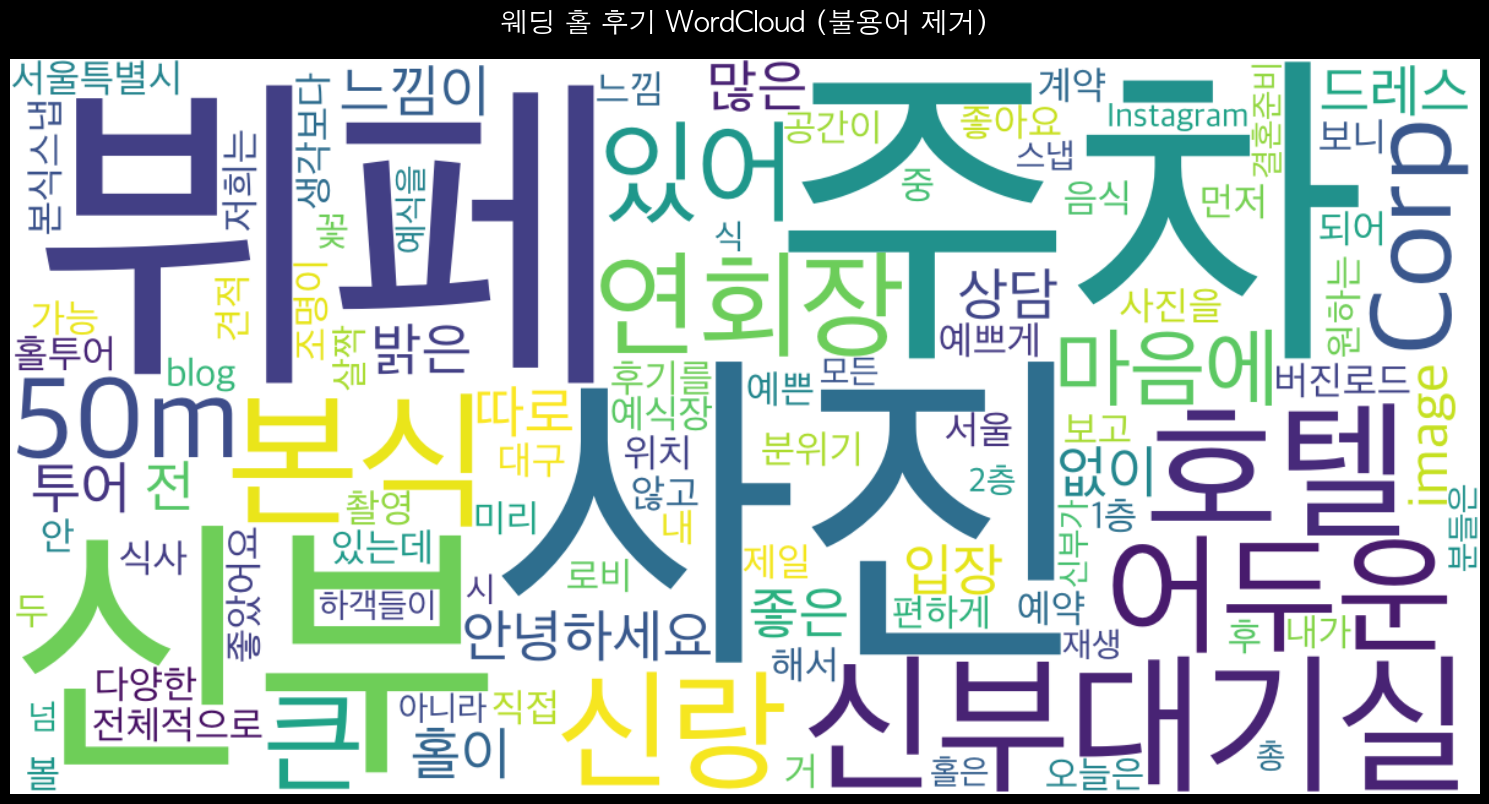

In [25]:
# 불용어 제거된 텍스트로 WordCloud 생성
wordcloud_filtered = WordCloud(
    font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    relative_scaling=0.3,
    colormap='viridis',
    collocations=False,
    stopwords=set(stop_words)  # 불용어 적용
).generate(all_text)

# 시각화
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('웨딩 홀 후기 WordCloud (불용어 제거)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

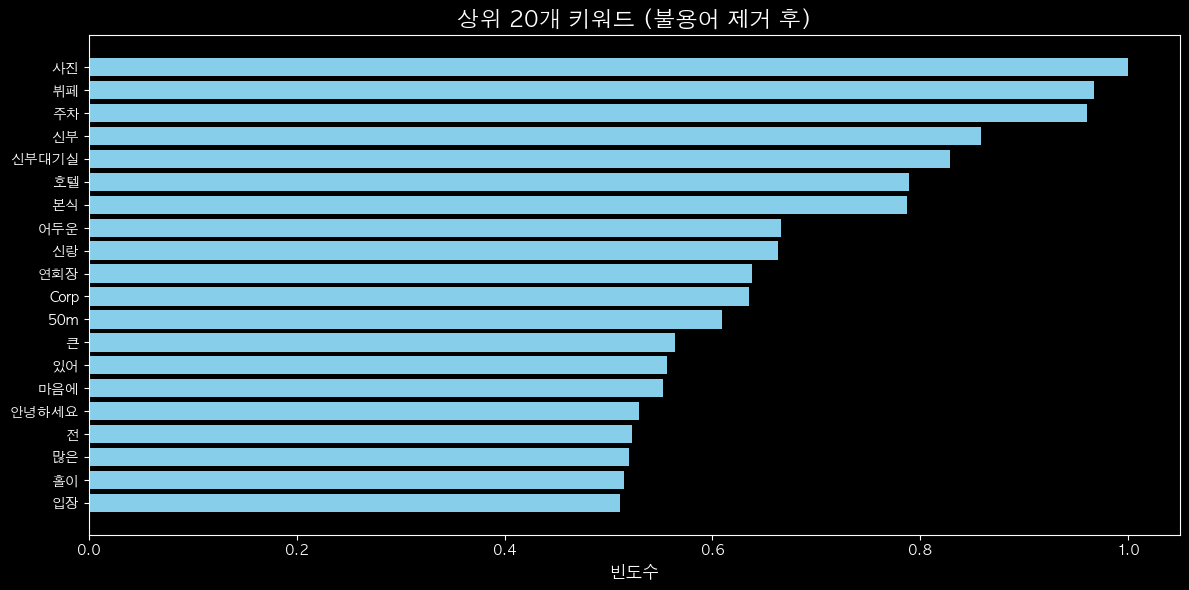


상위 20개 키워드 (불용어 제거 후):


,단어,빈도수
0,사진,1.000000
1,뷔페,0.967190
2,주차,0.960057
3,신부,0.858773
4,신부대기실,0.828816
5,호텔,0.788873
6,본식,0.787447
7,어두운,0.666191
8,신랑,0.663338
9,연회장,0.637660


In [26]:
# 불용어 제거 후 단어 빈도수 분석
word_freq_filtered = wordcloud_filtered.words_

# 상위 20개 단어
top_words_filtered = dict(sorted(word_freq_filtered.items(), key=lambda x: x[1], reverse=True)[:20])

# 막대그래프 시각화
plt.figure(figsize=(12, 6))
plt.barh(list(top_words_filtered.keys()), list(top_words_filtered.values()), color='skyblue')
plt.xlabel('빈도수', fontsize=12)
plt.title('상위 20개 키워드 (불용어 제거 후)', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 데이터프레임으로 출력
freq_df_filtered = pd.DataFrame(list(top_words_filtered.items()), columns=['단어', '빈도수'])
print("\n상위 20개 키워드 (불용어 제거 후):")
freq_df_filtered